Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes  
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 
par vos réponses, et remplissez les champs ci-dessous:

In [ ]:
NOM = "MARTINEZ"
PRENOM = "Maud"
GROUPE = "3"
DATE = "27/03/2019"

---

# TP8: Intégrales


 Pour se mettre en jambes

## Exercice 1: Méthode des trapèzes

Avec la méthode des trapèzes, on approxime une intégrale par


\begin{equation}
\int_a^b f(x){\rm d}x = h\times\left(\frac{f_0}{2} + f_1 + f_2 + \ldots + f_{n-1} + \frac{f_{n}}{2}\right) + O\left(\frac{(b-a)^3f''}{n^2}\right)
\end{equation}


où $x_i = a + i\times h$, avec un pas $h=(b-a)/n$, $f_i=f(x_i)$ et n est le nombre d'intervalles ($n+1$ est donc le nombre de points entre $a$ et $b$).

1. Définir une fonction $f$ simple que pouvez intégrer analytiquement (e.g. $f(x)=x^2$) ainsi qu'une fonction $F$ qui est sa primitive.
2. Définir un ```numpy``` array $x$ allant de 0 à 1 avec $n$ points également espacés (e.g. $n=100+1$ pour commencer) et le ```numpy``` array $f(x)$.
3. Définir une fonction ```my_trapz``` qui calcule l'intégrale sur $x$ de $f(x)$ par la méthode des trapèzes, qui prend pour arguments les deux tableaux précédents. *Astuce : réécrire légèrement la formule ci dessus, utiliser la fonction ```sum``` de ```numpy``` et soustraire deux termes.*
4. Comparer les résultats obtenus avec ```my_trapz``` et $F$, soit $F(1)-F(0)$
5. Comparer au résultat obtenu avec la fonction ```trapz``` de ```scipy.integrate``` 
6. Tracer les résidus en pour-cent : |"Intégrale my\_trapz" - "Intégrale analytique"|/"Intégrale analytique" en fonction du nombre $n$ de points utilisés (échelle log-log). On écrira donc une boucle sur le nombre de points $n$. Par exemple $n$ peut prendre valeurs $2^k$ pour k variant de 1 à 10.
7. (Optionnel) Comment les résidus varient-ils en fonction de n ? Superposer la loi attendue, en la normalisant à un point obtenu à grand $n$.

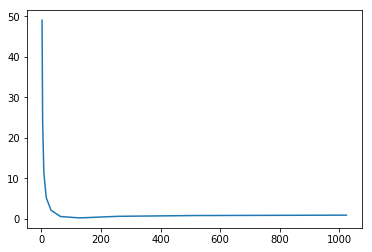

In [80]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot

#fontion x^2
def f(x):
    return x*x

#fonction integrale trapèze
def my_trapz(x, y, n):
    return (x[-1]-x[0])/n * (sum(y) - y[0]/2 - y[-1]/2)

Nlist=[]
Ylist= []


for k in range(1, 11):
    Nlist.append(2**k)

for n in Nlist :
    x= np.linspace(0, 1, n+1)
    y= f(x)

    y_mt =my_trapz(x_list, f_list, n)
    R= np.abs(y_mt-1/3)/(1/3)
    Ylist.append(R)
    

pyplot.plot(Nlist, Ylist)
pyplot.show()



 Quelques applications

## Exercice 2: Vitesse d'une flèche

<img align="center" src="plots/bow.png" width="20%" />

| x (m) | 0.00 | 0.05 | 0.10 | 0.15 | 0.20 | 0.25 | 0.30 | 0.35 | 0.40 | 0.45 | 0.50  
|---|---|---|---|---|---|---|---|---|---|---|---|
| F (N) | 0 | 37 | 71 | 104 | 134 | 161 | 185 | 207 | 225 | 239 | 250  

La force de traction appliquée à la corde d'un arc en fonction de l'allonge est donnée dans la table ci-dessus. Déterminer la vitesse d'une flèche de masse $m=0.075$\,kg au moment du tir pour une allonge totale de $x_{\rm max}=0.50$\,m, en m/s puis en km/h.

*Astuce : par conservation de l'énergie mécanique, l'énergie cinétique de la flèche $\frac{1}{2}mv^2$ est égale au travail du tireur sur la corde $\int_0^{x_{\rm max}} F(x){\rm d}x$.*

44.54211490264018
160.35161364950466


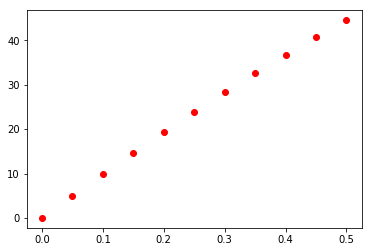

In [40]:
import numpy as np
from scipy import integrate

m = 0.075
x = np.array([0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50])
F= np.array([0, 37, 71, 104, 134, 161, 185, 207, 225, 239, 250] )

W = integrate.trapz(F, x)

v_ms=(2*W/m)**0.5
print(v_ms)
v_kmh = v*3.6
print(v_kmh)

y_int = integrate.cumtrapz(F, x, initial = 0)
V = (2*y_int/m)**0.5

fig= pyplot.figure()
pyplot.plot(x, V, 'ro')
pyplot.show()

## Exercice 3: Intégrale Gaussienne
Une distribution Gaussienne centrée sur zéro et de déviation standard est définie par : 

\begin{equation}
f(x) = C\times {\rm exp}(-(x-x_0)^2/2\sigma^2)
\end{equation}

où $x_0=0$, $\sigma=1$ et où la constante $C$ est fixée de sorte que l'intégrale de la Gaussienne de $-\infty$ à $+\infty$ soit égale à 1.

1. Vérifier à l'aide d'une intégration par la méthode des trapèzes entre $[-a;a]$ où $a$ est un "grand" nombre que $C = 1/\sqrt{2\pi*\sigma}$. On pourra utiliser cette valeur par la suite. *Astuce : afficher la distribution pour déterminer ce que "grand'' veut dire ici.*
2. Quelle est la fraction d'aire sous la courbe entre $[-1\sigma,+1\sigma]$ et entre  $[-3\sigma,+3\sigma]$?

En physique des hautes énergies, on exprime la probabilité $p$ ($p$-value en anglais) qu'un événement de "signal'' diffère des événements de "bruit'' en nombre de "$\sigma$'' Gaussiens, à l'aide de la relation suivante :


\begin{equation}
p = \int_{n\sigma}^\infty f(x){\rm d}x
\end{equation}


On considère souvent qu'un signal vu à "$3\sigma$" est une indication ("hint") , à "$4\sigma$" est un élément de preuve ("evidence'') , et à "$5\sigma$" une détection formelle. Autrement dit, la probabilité $p$ mesure la probabilité qu'un évènement enregistré par les détecteurs d'une expérience soit en réalité un évènement de bruit de fond, même un peu exceptionnel. 
1. À quelles probabilités correspondent les critères de "$3\sigma$", "$4\sigma$" et "$5\sigma$"?
2. La coïncidence spatiale et temporelle de l'onde gravitationnelle GW170817 (issue de la fusion d'étoile à neutrons) et du sursaut gamma GRB170817A a été mesurée avec $p=1.3\times10^{-5}$. Quelle est le nombre de "$\sigma$" correspondant ?

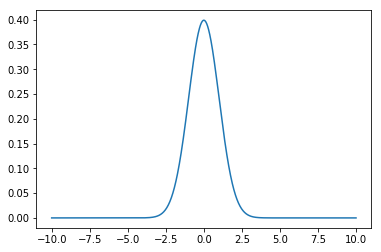

1.0


In [24]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot

Xo = 0
s = 1
C = 1/ ((2* np.pi*s)**0.5)

def f(x):
    return C*np.exp(-((x- Xo)**2)/(2*s**2))

x = np.linspace(-10, 10, 1000)
y =f(x)

fig = pyplot.figure()
pyplot.plot(x, y)
pyplot.show()

F = integrate.trapz(y, x)
print(F)

## Exercice 4: Période d'un pendule simple

En l'absence de frottements, les oscillations d'un pendule simple vérifient l'équation différentielle :
\begin{equation}
  \ddot \theta + \omega_0^2 \sin\theta = 0
  \label{eq:diff}
\end{equation}
avec $\theta$ l'angle entre le pendule et la verticale du lieu.
L'équation différentielle ci-dessus n'a pas de solution
analytique, mais il est possible de déterminer une expression théorique de la
période $T$ du pendule. On peut montrer que :
\begin{equation}
  T = \dfrac{2 \sqrt{2}}{\omega_0} \int_{\theta=0}^{\theta_0}
  \dfrac{ {\rm d}\; \theta}{\sqrt{\cos\theta - \cos\theta_0}}
  \label{eq:periode}
\end{equation}

Cette intégrale n'a pas d'expression analytique simple non plus. 
On se propose de la calculer numériquement avec python. On pourra prendre
$\omega_0 = 3\,$rad$\cdot$s$^{-1}$.



1. Calculer la période $T$ des
oscillations pour $\theta_0 = 0,1\,$rad, pour $\theta_0 = 3\,$rad, par la méthode de votre choix.

2. Comparer les résultats obtenus aux valeurs qu'on obtient
dans l'approximation des petits angles $\theta \ll 1$  :  $T =
\dfrac{2 \pi}{\omega_0}$.


3. Tracer la courbe donnant la période $T$ des oscillations du
pendule simple en fonction de l'angle initial $\theta_0$.

Il existe une formule approchée donnant la période du pendule meilleure
que la formule pour les petites oscillations ($T =
\dfrac{2\pi}{\omega_0}$). Il s'agit de la formule de Borda :

\begin{equation}
  T \simeq \frac{2 \pi}{\omega_0}\left(1 +
  \dfrac{\theta_0^2}{16}\right).
  \label{eq:borda}
\end{equation}

4. Compléter le graphe précédent avec la période donnée par la
formule de Borda.

5. *(Facultatif)* Écrire une fonction \texttt{borda\_juste(p)} qui retourne
l'angle $\theta_{\rm max}$ tel que la formule de Borda  donne le vrai
résultat à moins de $p$ pourcent près pour $\theta < \theta_{\rm max}$.

/opt/methnum/miniconda3/envs/methnum/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/opt/methnum/miniconda3/envs/methnum/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


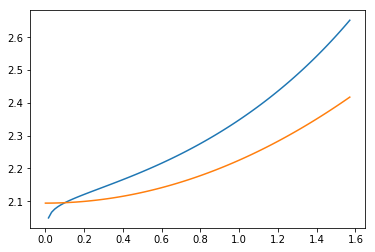

In [73]:
THo = 3
Wo = 3

def f(Th,THo): 
    return 1/((np.cos(Th)-np.cos(THo))**0.5)

thetalist=np.linspace(0,np.pi/2,100)
Tlist=[]
T1list=[]
for THo in thetalist:
    x= np.linspace(0, THo-0.00001, 1000)
    y= f(x,THo)

    F=integrate.trapz (y, x)
    T= F*(2*(2)**0.5)/Wo
    T1=(2*np.pi/Wo)*(1+ THo**2/16)
    Tlist.append(T)
    T1list.append(T1)
pyplot.plot(thetalist, Tlist)
pyplot.plot(thetalist, T1list)
pyplot.show()


## Exercice 5: Quelques intégrales


1. Évaluer $\int_1^\infty\frac{1}{1+x^4}$ par la méthode de votre choix. Comparer au résultat attendu (0.24375). Effectuer numériquement le changement de variable $x^3=1/t$ et évaluer de nouveau cette intégrale.

2. Évaluer $\int_0^1 \frac{\sin x}{\sqrt{x}}$ par la méthode de votre choix. On pourra effectuer un changement de variable approprié.

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()